<h1> Project on  Clustering : Creating Customer Cluster to identify different Customers</h1>
<p> Instructor : Mr. Shriraman Rajagopalan <br>By: Kalyan Chatterjee<p>

<h3/><font color="green">Aim of The Project:<font></h3>
<p>We have been provided with different customer details of a Mall. We need to group the similar type of Customers by their Shopping pattern, spending pattern, shopping score, salary etc.. 
By doing so mall authority can strategize its offerings in such a way that it targets only right customers for specific products, resulting a good business strategy

In [44]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import  AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
warnings.filterwarnings("ignore")

In [45]:
data = pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")

In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
data.shape

(200, 5)

In [48]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [50]:
cat=[]
cont=[]
for col in data.keys():
    if data[col].nunique() > 10:
        cont.append(col)
    else:
        cat.append(col)
cont.remove("CustomerID")
        
print(tabulate({"Categorical":cat,"Continuous":cont},headers="keys"))

Categorical    Continuous
-------------  ----------------------
Gender         Age
               Annual Income (k$)
               Spending Score (1-100)


<h3>Univariate Analysis: Categorical data

In [51]:
pal= ["#EE9A4D","#C11B17","#033E3E","#659EC7","#4EE2EC","#AAF0D1","#2E8B57","#F5DEB3","#033E3E"]
def uni_count_plot(df,col):
    ax=sns.countplot(df[col],linewidth=3,palette=pal[:df[col].nunique()])
    for bar in ax.patches:
        h= bar.get_height()
        str1= str(h)
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(str1, (x, h), va = "bottom", ha ="center" )

Text(0.5, 1.0, 'Gender Count')

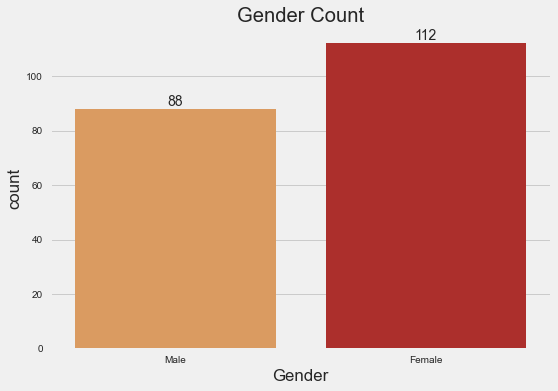

In [52]:
uni_count_plot(data,"Gender")
plt.title("Gender Count")

<p><b>112 of all the customers are Female While 88 Customers are female.

# Univariate analysis: Numerical Data

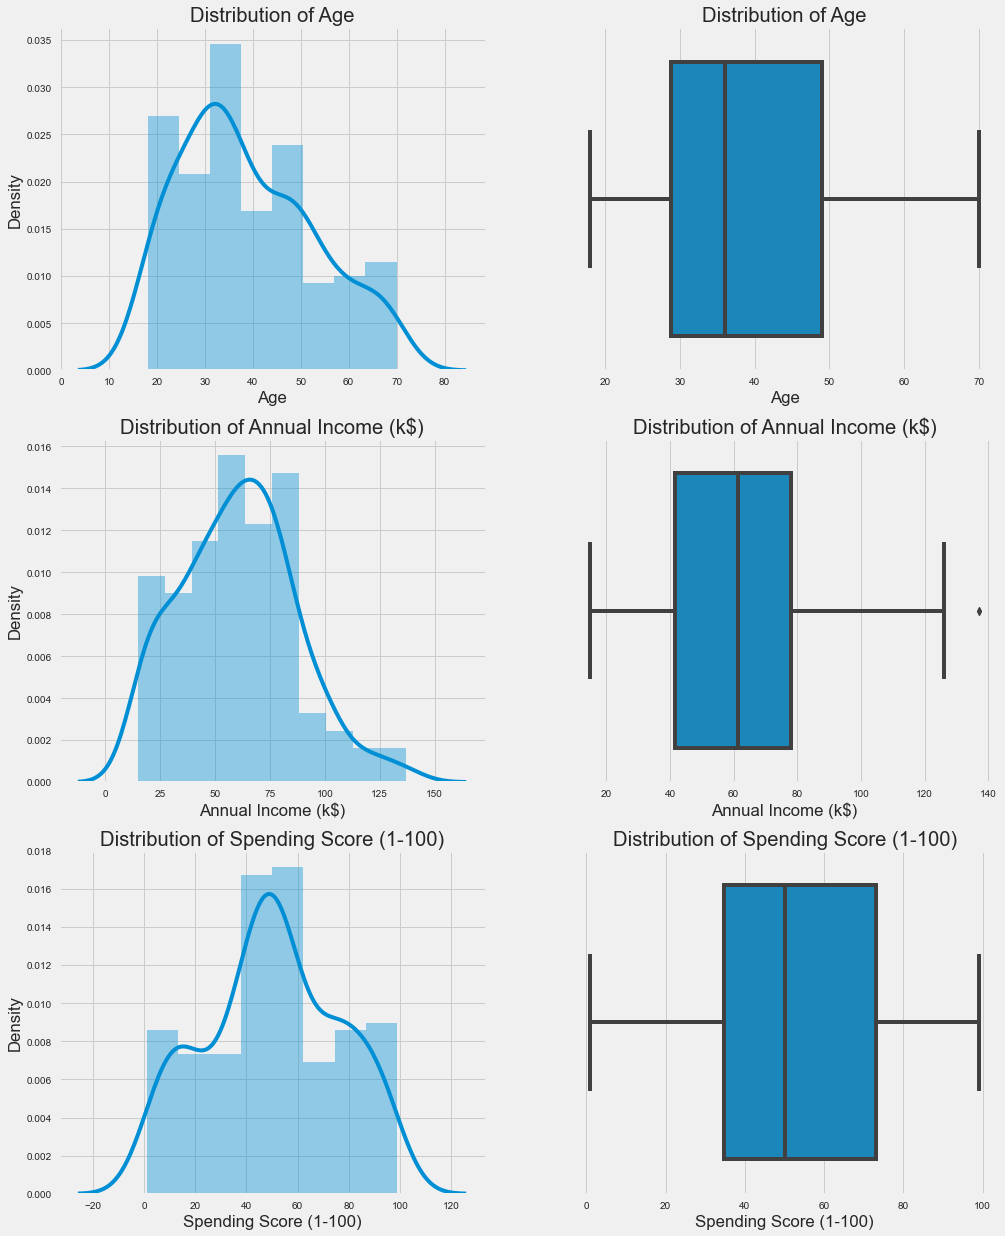

In [53]:

fig,ax = plt.subplots(nrows= 3,ncols=2,figsize= (15,20))
k=0
for i in cont:
    sns.distplot(data[i],ax=ax[k][0])
    ax[k][0].set_title(f"Distribution of {i}")

    sns.boxplot(data[i],ax=ax[k][1])
    ax[k][1].set_title(f"Distribution of {i}")
    
    k=k+1

<p>We can see that for  "Annual Income"  there is one outlier which is greater that 130k $

In [54]:
data= data[data["Annual Income (k$)"]<130]
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


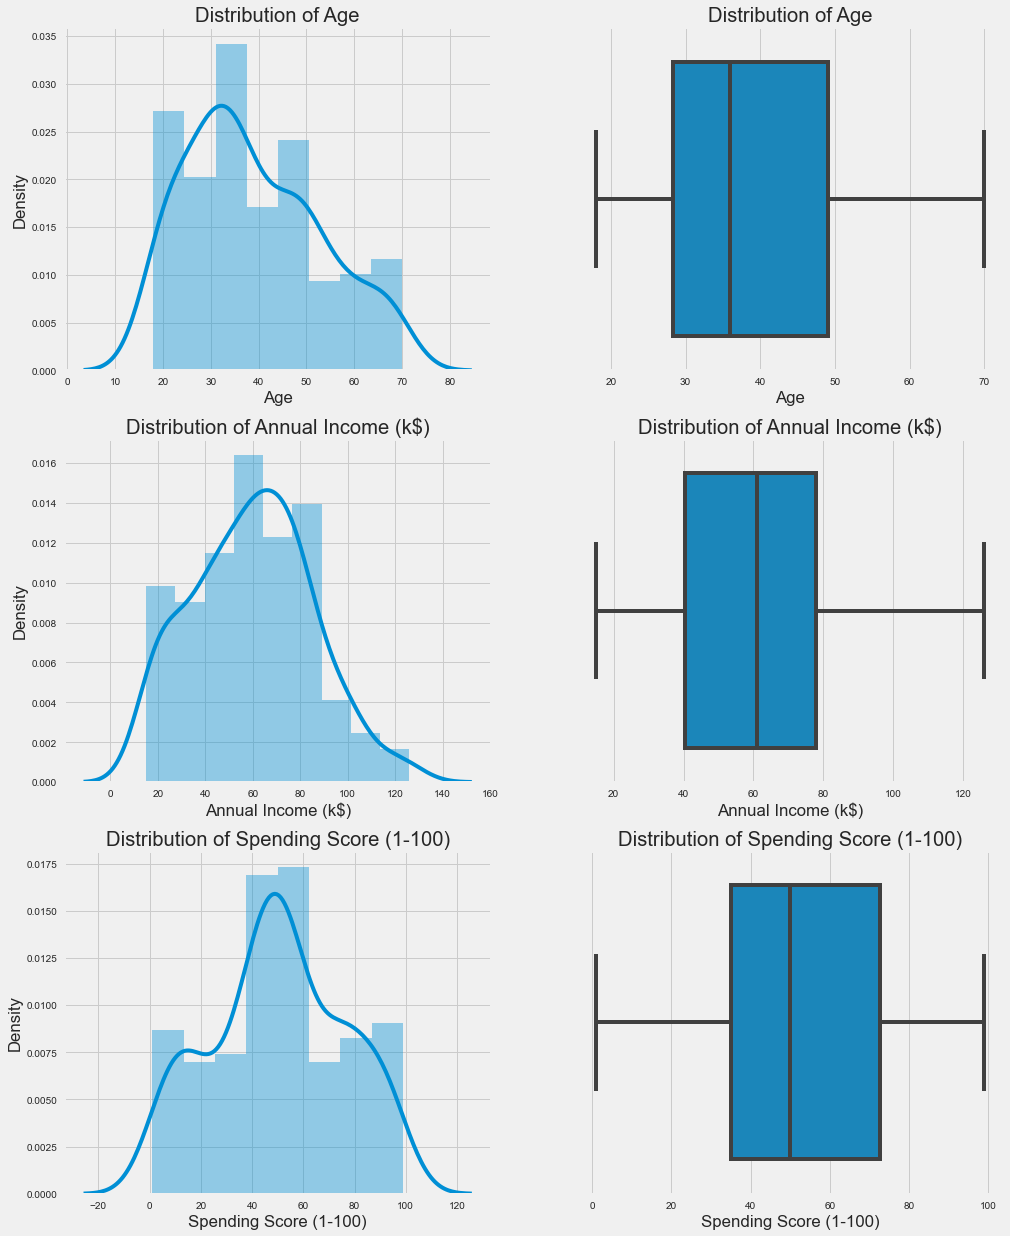

In [55]:

fig,ax = plt.subplots(nrows= 3,ncols=2,figsize= (15,20))
k=0
for i in cont:
    sns.distplot(data[i],ax=ax[k][0])
    ax[k][0].set_title(f"Distribution of {i}")

    sns.boxplot(data[i],ax=ax[k][1])
    ax[k][1].set_title(f"Distribution of {i}")
    
    k=k+1

<h3>Now we can see that the data set has no outliers present.

# Bivariate Analysis

Text(0.5, 1.0, 'Annual Income vs Spnding Score')

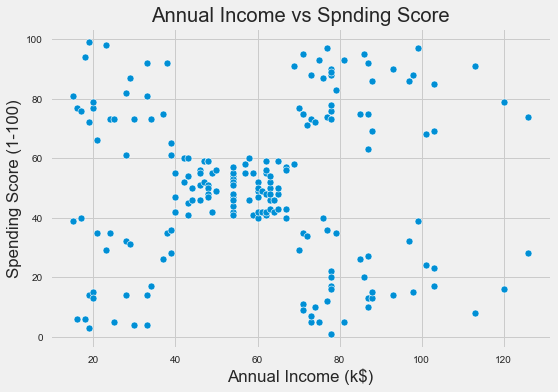

In [56]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"])
plt.title("Annual Income vs Spnding Score")

We can clearly see by naked eye that the dataset is consists of 5 clusters if we considered the "Annual Income" and "Spending Scores" as two features. 
1. Less income more spending
2. Less income less spending
3. More income less spending
4. More income more spending
5. Moderate income and Moderate Spending

Text(0.5, 1.0, 'Age vs Spending Score')

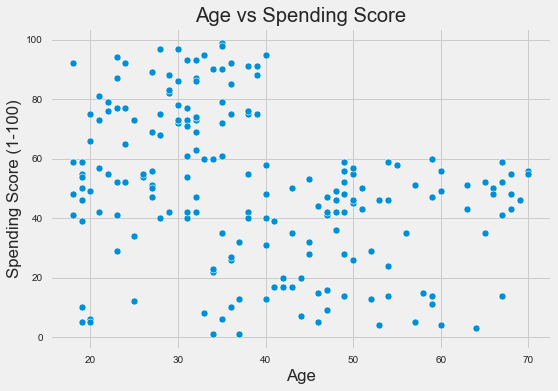

In [159]:
sns.scatterplot(x=data["Age"],y=data["Spending Score (1-100)"])
plt.title("Age vs Spending Score")

We can see from the above scatter plot that Older customers have a low Spending Scores and younger customers have highest Spending Scores.

# Multivariate Analysis 

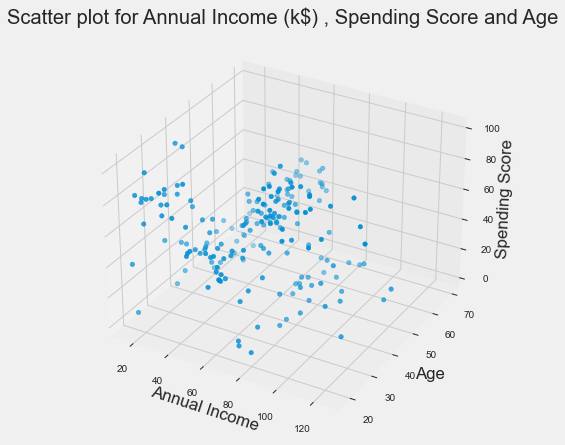

In [60]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D( data["Annual Income (k$)"], data["Age"],data["Spending Score (1-100)"])
plt.title("Scatter plot for Annual Income (k$) , Spending Score and Age" )
plt.xlabel ("Annual Income")
plt.ylabel ("Age")
ax.set_zlabel("Spending Score")
# show plot
plt.show()

<h3>In the above 3d Scatter plot we can not see any proper clustering with Naked Eye

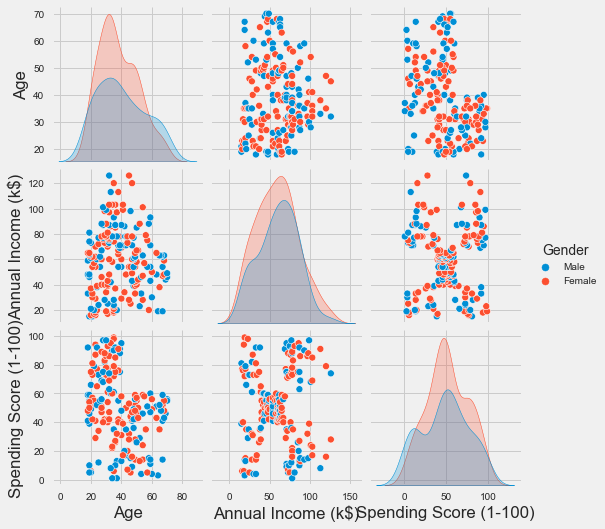

In [61]:
sns.pairplot(data.drop("CustomerID",axis=1),hue='Gender')

<h3>Clearly all the features are independent of each other as there is no correlation exists between them. We can confirm the same using heatmap

<AxesSubplot:>

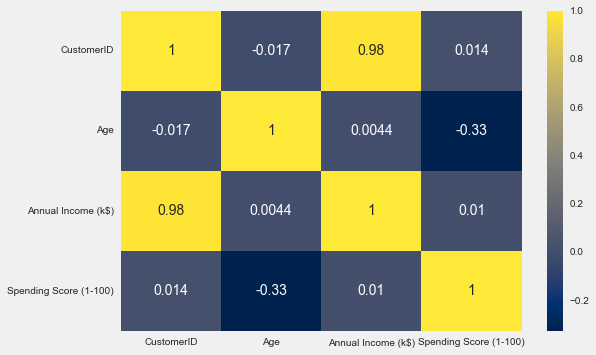

In [62]:
sns.heatmap(data.corr(),annot=True,cmap='cividis')

# Creating Clustering Models : 

In [63]:
df=data.copy()

In [65]:
encoder= LabelEncoder()
df.Gender= encoder.fit_transform(data.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<h3>Bivariate Clustering (Customer Income and Spending Score)

In [88]:
df1= df.drop(["CustomerID","Gender","Age"],axis=1)
scaler= MinMaxScaler() 
df1=scaler.fit_transform(df1)

# Kmeans - Algorithm

# Finding Number of Clusters using Elbow Method

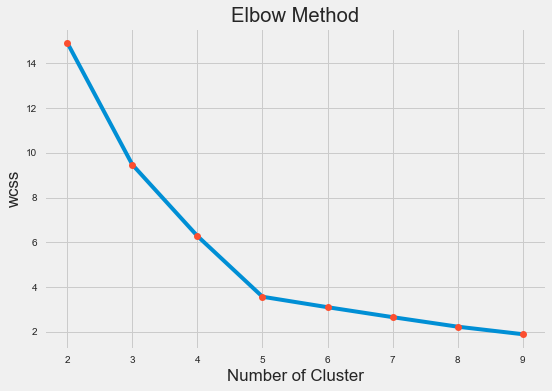

In [89]:
wcss=[]
r= range(2,10)

for i in r:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit (df1)
    wcss.append(kmeans.inertia_)
    
plt.plot(r,wcss)
plt.plot(r,wcss,"o")
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

We can see from the Elbow Cureve that for number of Cluster = 5 the Model will work properly.

# Finding Optimum number of Cluster by silhouette score

In [90]:
sl_score =[]
for i in r:
    model = KMeans(n_clusters=i  ,init= "k-means++", max_iter=300,n_init=1,random_state=1 )
    model.fit(df1)
    y_pred = model.predict(df1)
    sl_score.append(silhouette_score(df1,y_pred ))
print(sl_score)

[0.3317652103920583, 0.45462698579924626, 0.4991355347031858, 0.5640959164678206, 0.4607510761488686, 0.4547555803226938, 0.43487094993924585, 0.4399508529823823]


Text(0, 0.5, 'Inertia Score')

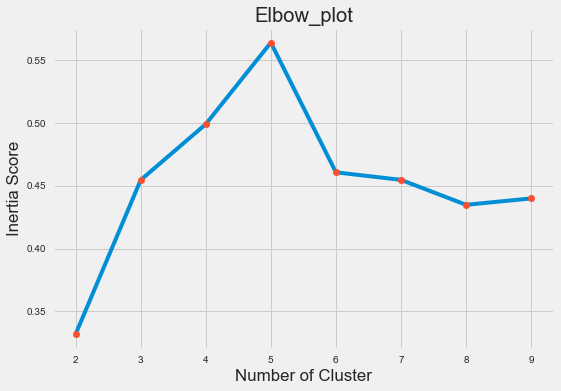

In [91]:
plt.style.use("fivethirtyeight")
plt.plot(r, sl_score)
plt.plot(r, sl_score,"o")
plt.title("Elbow_plot")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia Score")

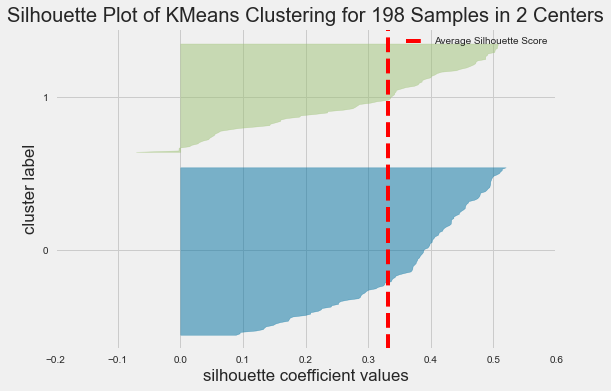

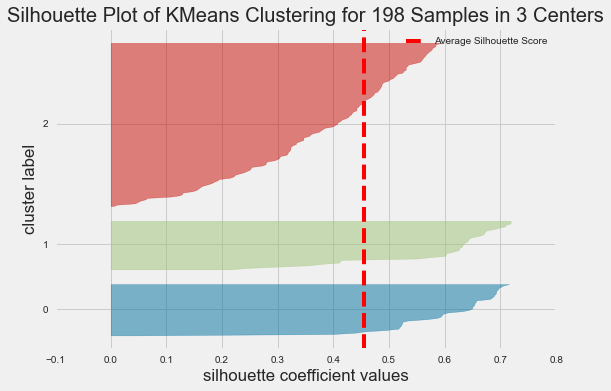

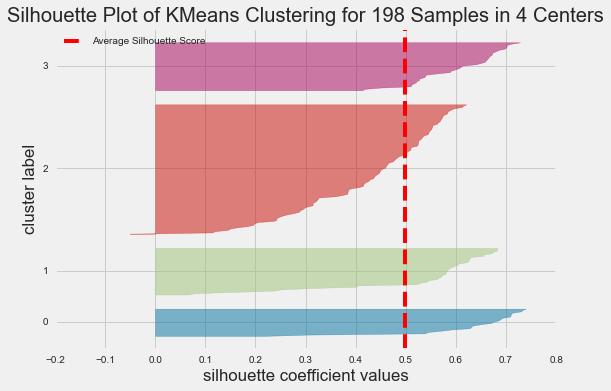

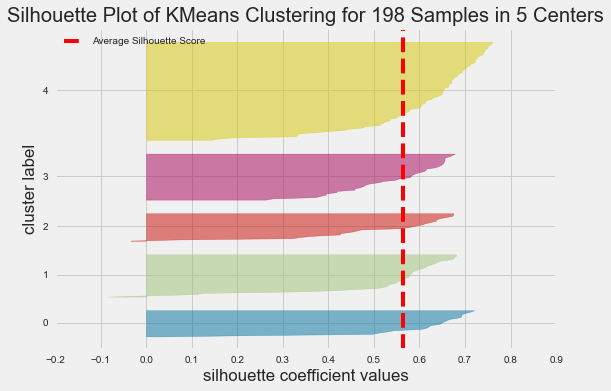

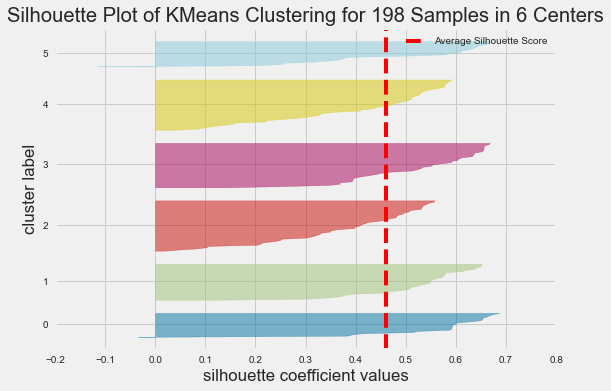

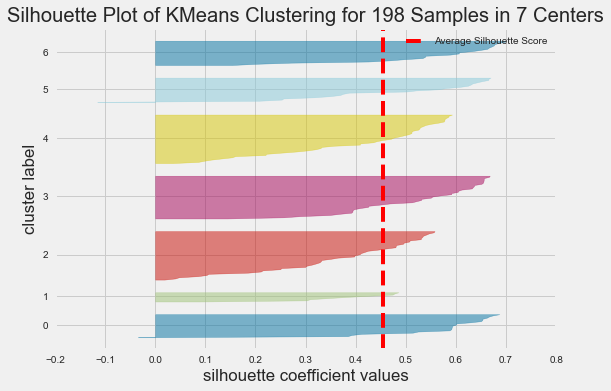

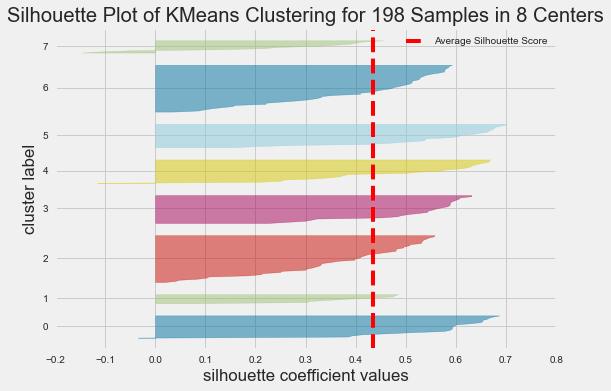

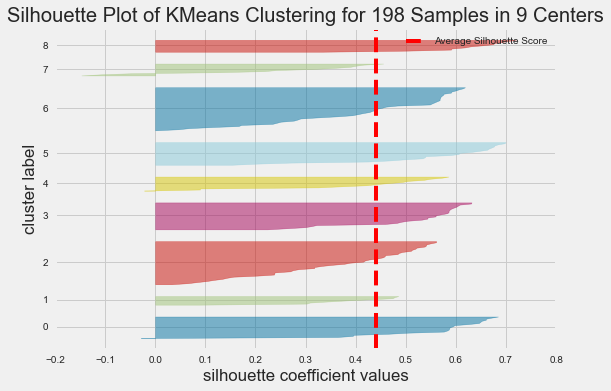

In [92]:
for i in r:
    plt.style.use("fivethirtyeight")
    model = KMeans(n_clusters=i  ,init= "k-means++", max_iter=300,n_init=1 ,random_state=1)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    
    visualizer.fit(df1)        # Fit the data to the visualizer
    visualizer.show()  
    

The vertical dashed lines represent the silhouette score for each number of clusters.\
When most of the instances in a cluster have a lower coefficient than this score (i.e., if\
many of the instances stop short of the dashed line, ending to the left of it), then the\
cluster is rather bad since this means its instances are much too close to other clusters.\
We can see that when  k=5, the clusters look pretty good – most instances extend beyond the dashed line, to\
the right and closer to 1.0.

<h6>Silhouette plot also confirms thats Number of Clusters should be 5

<h4>Making K_means Model with k = 5 

In [93]:
model_kmeans = KMeans(n_clusters=5 ,init= "k-means++", max_iter=50,n_init=1,random_state=1 )
model_kmeans.fit(df1)
y_pred_kmeans = model_kmeans .predict(df1)

Text(0.5, 1.0, 'Annual Income vs Spnding Score')

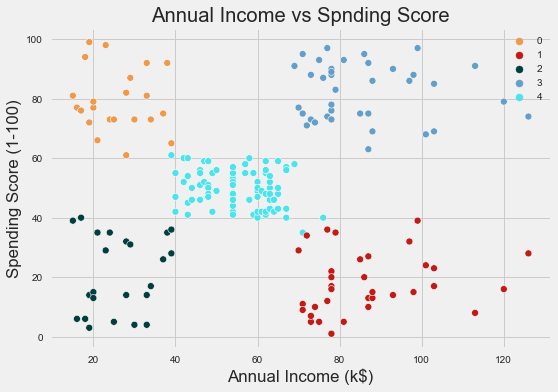

In [94]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue = y_pred_kmeans, palette= pal[:len(np.unique(model_kmeans.labels_))])
plt.title("Annual Income vs Spnding Score")

# DBSCAN Clustering

In [95]:
e= np.linspace(0.01,0.2,10)
s = [5,10,15]
for i in e:
    for j in s:
        dbscan= DBSCAN(eps=i,min_samples=j)
        print (f"For ep= {i} and min_samples = {j}\n The labesls are : {np.unique(dbscan.fit_predict(df1))}","\nOutliers percentage= ",round(100*(len(df1)-len(dbscan.core_sample_indices_))/len(df1),2),"%\n")
        

For ep= 0.01 and min_samples = 5
 The labesls are : [-1] 
Outliers percentage=  100.0 %

For ep= 0.01 and min_samples = 10
 The labesls are : [-1] 
Outliers percentage=  100.0 %

For ep= 0.01 and min_samples = 15
 The labesls are : [-1] 
Outliers percentage=  100.0 %

For ep= 0.03111111111111111 and min_samples = 5
 The labesls are : [-1  0  1  2  3  4  5] 
Outliers percentage=  81.31 %

For ep= 0.03111111111111111 and min_samples = 10
 The labesls are : [-1  0] 
Outliers percentage=  98.99 %

For ep= 0.03111111111111111 and min_samples = 15
 The labesls are : [-1] 
Outliers percentage=  100.0 %

For ep= 0.052222222222222225 and min_samples = 5
 The labesls are : [-1  0  1  2  3  4  5  6] 
Outliers percentage=  49.49 %

For ep= 0.052222222222222225 and min_samples = 10
 The labesls are : [-1  0] 
Outliers percentage=  76.77 %

For ep= 0.052222222222222225 and min_samples = 15
 The labesls are : [-1  0  1] 
Outliers percentage=  93.94 %

For ep= 0.07333333333333333 and min_samples = 5
 

<h6>For epsilon = 0.09 and min_samples =5 we will get 4 clusters and less percentage of outliers. Therefore we are considering epsilon = 0.09 and min_samples =5 

In [96]:
dbscan= DBSCAN(eps=0.09,min_samples=5)
y_pred_dbscan= dbscan.fit_predict(df1)
dbscan.labels_

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,  1,  0,  1, -1,
        1,  0,  1,  0,  2,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1,  4, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Text(0.5, 1.0, 'Annual Income vs Spnding Score')

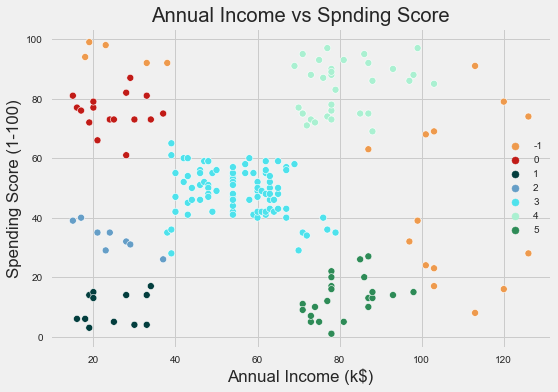

In [97]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue = y_pred_dbscan, palette= pal[:len(np.unique(dbscan.labels_))])
plt.title("Annual Income vs Spnding Score")

# HDBSCAN Clustering

In [99]:
c=range(2,10)
for i in c:
    model_hdbscan= hdbscan.HDBSCAN(min_cluster_size=i)
    print ("For min cluster size =",i,"\n The labesls are :",np.unique(model_hdbscan.fit_predict(df1)))
        

For min cluster size = 2 
 The labesls are : [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
For min cluster size = 3 
 The labesls are : [-1  0  1  2  3  4  5  6  7]
For min cluster size = 4 
 The labesls are : [-1  0  1  2  3  4  5]
For min cluster size = 5 
 The labesls are : [-1  0  1  2  3  4]
For min cluster size = 6 
 The labesls are : [-1  0  1  2  3  4]
For min cluster size = 7 
 The labesls are : [-1  0  1  2  3  4]
For min cluster size = 8 
 The labesls are : [-1  0  1  2  3  4]
For min cluster size = 9 
 The labesls are : [-1  0  1  2  3]


<h6>for cluster size 5,6,7 we are getting 5 clusters and some outliers

In [100]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=7, gen_min_span_tree=True)
y_pred_hdbscan=clusterer.fit_predict(df1)

In [101]:
clusterer.labels_

array([-1, -1, -1,  4, -1,  4,  1, -1,  1,  4,  1, -1,  1,  4,  1,  4, -1,
       -1, -1, -1, -1,  4,  1,  4,  1,  4, -1, -1,  3, -1, -1,  4, -1, -1,
        1, -1, -1,  3,  1, -1,  3, -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0, -1,  0,  3,  0,  2,  0,  2,  0,  3,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  3,  0,  2,  0, -1,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Text(0.5, 1.0, 'Annual Income vs Spnding Score')

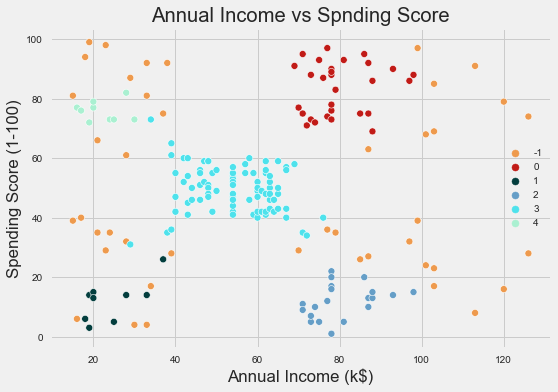

In [102]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue = y_pred_hdbscan, palette= pal[:len(np.unique(model_hdbscan.labels_+1))+1])
plt.title("Annual Income vs Spnding Score")

 # Agglomerative Clustering

In [103]:
Agg = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
agg_pred= Agg.fit_predict(df1)

Text(0.5, 1.0, 'Annual Income vs Spnding Score')

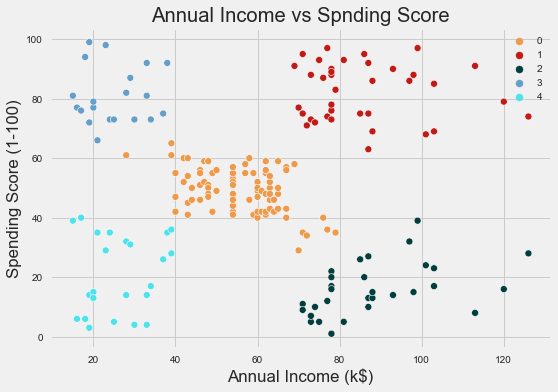

In [104]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue = agg_pred, palette= pal[:len(np.unique(Agg.labels_+1))])
plt.title("Annual Income vs Spnding Score")

1. KMeans is giving 5 Clusters but it is not considering the outliers.
2. DBSCAN method is giving 4 clusters and it consists of outliers.
3. Agglomerative Clustering  is giving 5 Clusters and behaving better at the bouderies.
4. HDBSCAN is giving 5 Clusters and it consists of outliers.

As we have only 200 instances therefore, if we lose too many data as outliers tehn out model will become underfitted.\

Therefore we are considering Agglemerative Clustering For our final Model

<h3> Final Model

In [105]:
Agg = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
data["Agg_Label"]= Agg.fit_predict(df1)

In [106]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agg_Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Text(0.5, 1.0, 'Annual Income vs Spnding Score')

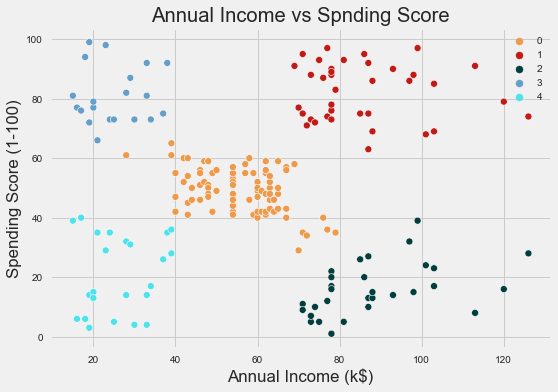

In [107]:
sns.scatterplot(x=data["Annual Income (k$)"],y=data["Spending Score (1-100)"],hue = agg_pred, palette= pal[:len(np.unique(Agg.labels_+1))])
plt.title("Annual Income vs Spnding Score")

Text(0.5, 1.0, 'Label Wise Gender Count')

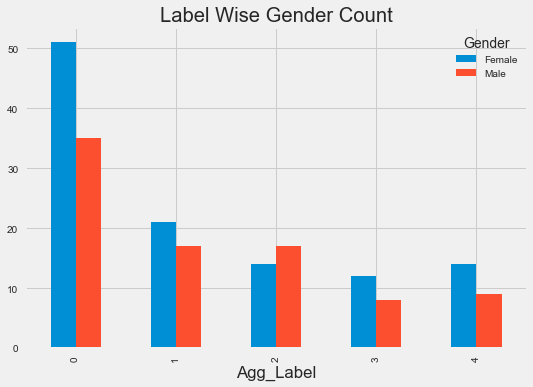

In [108]:
pd.crosstab(data['Agg_Label'],data['Gender']).plot(kind="bar")
plt.title("Label Wise Gender Count")

In [109]:
pd.pivot_table(data,index="Agg_Label",values= "Age")

,Age
Agg_Label,
0,42.395349
1,32.763158
2,41.290323
3,24.850000
4,45.217391


In [110]:
pd.pivot_table(data,index="Agg_Label",values= "Annual Income (k$)")

,Annual Income (k$)
Agg_Label,
0,55.488372
1,85.210526
2,87.870968
3,24.950000
4,26.304348


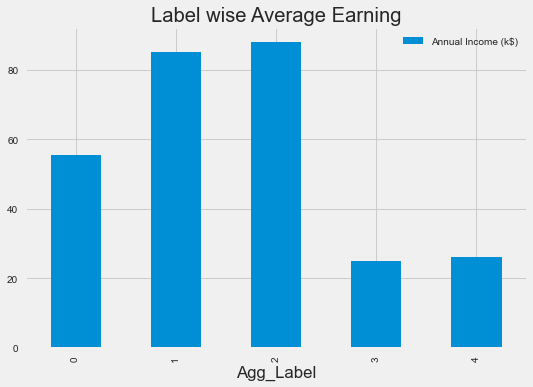

In [111]:
pd.pivot_table(data,index="Agg_Label",values= "Annual Income (k$)").plot(kind="bar")
plt.title("Label wise Average Earning")
plt.show()

<h3/> <font color="green">Conclusion From Clustering With Average Income for a Customer and Spending Score: <font> </h3>

1. Averge age of customers with label 0 is 42 years & their Salary and spending both are moderate.
2. Averge age of customers with label 1 is 33 years & their Salary and spending both are High.
3. Averge age of customers with label 2 is 41 years & their Salary is High but spendings are less.
4. Averge age of customers with label 3 is 25 years & their Salary is Low but spendings are High .
5. Averge age of customers with label 4 is 45 years & their Salary and Spending Both are low.

<p/>Therefore we can say that label 3 and Label 1 customers are the top customers of the Mall. Where label 1 may be those rich and experienced person with high salary and expensive requirements and label 3 may be inexperience freshers or students whose earning is less but requirements are expensive too. </p>

Mall should encourage those customers with more offers and recommendation of what similar buyers prefer in order to get a good business output.

<h3>Multivariate Clustering (Customer Income,Age and Spending Score)

In [133]:
df5= df.drop(["CustomerID","Gender"],axis=1)
scaler= MinMaxScaler() 
df5_scal=scaler.fit_transform(df5)

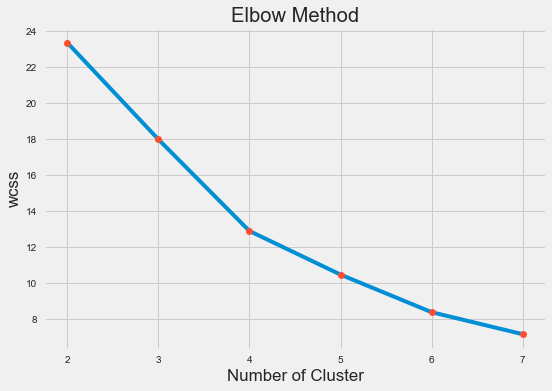

In [134]:
wcss=[]
r= range(2,8)

for i in r:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init=100)
    kmeans.fit (df5_scal)
    wcss.append(kmeans.inertia_)
    
plt.plot(r,wcss)
plt.plot(r,wcss,"o")
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

Optimum number of Clusters= 5

In [135]:
model_kmeans = KMeans(n_clusters=5 ,init= "k-means++", max_iter=50,n_init=1,random_state=1 )
model_kmeans.fit(df5_scal)
y_pred_kmeans = model_kmeans .predict(df5_scal)
df5["Label"] = y_pred_kmeans

No handles with labels found to put in legend.


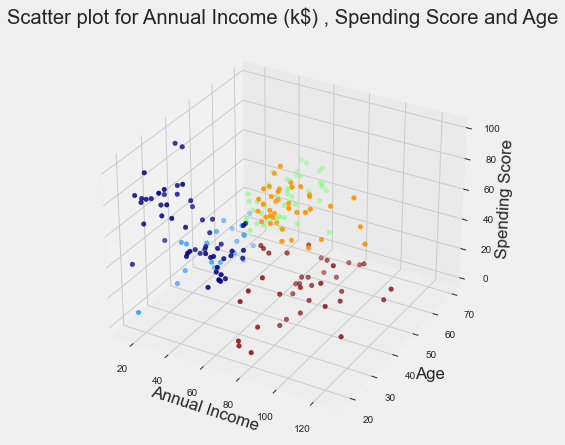

In [136]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D( data["Annual Income (k$)"], data["Age"],data["Spending Score (1-100)"],c=y_pred_kmeans,cmap=plt.get_cmap("jet"),)
plt.legend()
plt.title("Scatter plot for Annual Income (k$) , Spending Score and Age" )
plt.xlabel ("Annual Income")
plt.ylabel ("Age")
ax.set_zlabel("Spending Score")
# show plot
plt.show()

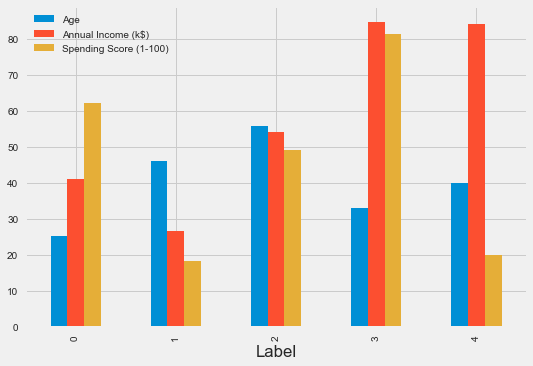

In [147]:
df5= df5.sort_values("Label")

pd5=pd.pivot_table(df5,index= "Label").plot(kind="bar")

<h3/> <font color="green">Conclusion From Clustering With Average Income,Age and spending score for a Customer : <font> </h3>

    1. Cluster 0 : Younger customers with moderate income and Spending score is high. 
    2. Cluster 1 : Middle age Customers with income below average and  very less Spending Scores.
    3. Cluster 2 : Older Customers with both income and Spending score is moderate.
    4. Cluster 3:  Middle age Customers with high income and very high spending Scores.
    5. Cluster 4 : Customers of age group 35-45 and income is high but spending score is very less.

<p/>Therefore we can say that label 0 and Label 3 customers are the top customers of the Mall.</p>

Mall should encourage those customers with more offers and recommendation of what similar buyers prefer in order to get a good business output.